<h1> NLP and the Web: Home Exercise 2 </h1>

Language Modeling is one of the most crucial tasks in natural language processing. According to <a href="https://web.stanford.edu/~jurafsky/slp3/3.pdf">Jurafsky \& Martin, 2019</a> the simplest approach for a language model is assigning probabilities to  sentences and sequences of words, also known as n-grams, where n is a number. For instance, a bigram (2-gram) is a sequence of two words. In order to assign probabilities, we need to calculate the frequency of the bigram and divide it by the total number of bigrams in a corpus. Below you find a matrix of bigram counts for eight words (Taken from <a href="https://web.stanford.edu/~jurafsky/slp3/3.pdf">Jurafsky \& Martin, 2019</a>).

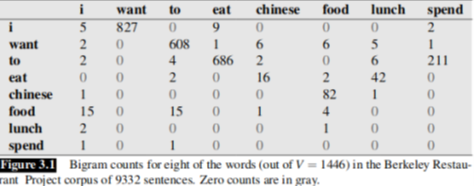

Using the knowledge presented in the last class, do the following exercises. Next to the standard python funtionality you are allowed to use the following libraries: <a href="https://pandas.pydata.org/docs/">pandas</a>, <a href="https://numpy.org/">numpy</a>, <a href="https://scikit-learn.org/stable/">scikit-learn</a>. We've already imported pandas and numpy for you.





In [1]:
# Imports
import pandas as pd
import numpy as np
import string
from collections import Counter

## Task 1 - 2 Points
Using the data structures presented in today’s class do the following tasks. You are allowed to use additional cells for further calculations.

For this task you have to use the dataset from the file yelp_polarity.txt. This file has two columns which are separated by '\t'. The first column contains reviews and the second column contains a sentiment label per review (0=negative, 1=positive).

##### a) Read the file yelp_polarity.txt into a dataframe and implement the function `word_tokenize_without_punctuation`. It shall tokenize the sentences in file yelp_polarity.txt, removing punctuation ( '.', ',', ':', ';', '?', '!') and lowercasing. This function shall be applied to each sentence in the dataframe . The result shall be appended as an additional column.

In [2]:
def word_tokenize_without_punctuation(text):
    """
    Segments a stream of characters into tokens and removes puntuation
    Example: "Wow... Loved this place." => ["wow", "loved", "this", "place"]
    @param text: String that should be tokenized
    @return: List of token strings
    """
    # Remove the following characters
    punctuation = ['.', ',', ':', ';', '?', '!']
#     pass
    text_temp = text.lower().replace('.',' .').replace(',',' ,').replace(':',' :').replace(';',' ;').replace('?',' ?').replace('!',' !')
    token_without_punc = [w for w in text_temp.strip().split() if w not in punctuation]
    return token_without_punc
    
df_header = ["sentence","label"]
dataframe = pd.read_csv("yelp_polarity.txt", sep="\t", header=None, names=df_header)
dataframe["token_without_punctuation"] = dataframe["sentence"].map(word_tokenize_without_punctuation)
dataframe = dataframe.reindex(columns = ["sentence","token_without_punctuation","label"])




In [3]:
display(dataframe)

,sentence,token_without_punctuation,label
0,Wow... Loved this place.,"[wow, loved, this, place]",1
1,Crust is not good.,"[crust, is, not, good]",0
2,Not tasty and the texture was just nasty.,"[not, tasty, and, the, texture, was, just, nasty]",0
3,Stopped by during the late May bank holiday of...,"[stopped, by, during, the, late, may, bank, ho...",1
4,The selection on the menu was great and so wer...,"[the, selection, on, the, menu, was, great, an...",1
...,...,...,...
995,I think food should have flavor and texture an...,"[i, think, food, should, have, flavor, and, te...",0
996,Appetite instantly gone.,"[appetite, instantly, gone]",0
997,Overall I was not impressed and would not go b...,"[overall, i, was, not, impressed, and, would, ...",0
998,"The whole experience was underwhelming, and I ...","[the, whole, experience, was, underwhelming, a...",0


In [4]:
dataframe["token_without_punctuation"].astype(str)

0                      ['wow', 'loved', 'this', 'place']
1                         ['crust', 'is', 'not', 'good']
2      ['not', 'tasty', 'and', 'the', 'texture', 'was...
3      ['stopped', 'by', 'during', 'the', 'late', 'ma...
4      ['the', 'selection', 'on', 'the', 'menu', 'was...
                             ...                        
995    ['i', 'think', 'food', 'should', 'have', 'flav...
996                    ['appetite', 'instantly', 'gone']
997    ['overall', 'i', 'was', 'not', 'impressed', 'a...
998    ['the', 'whole', 'experience', 'was', 'underwh...
999    ['then', 'as', 'if', 'i', "hadn't", 'wasted', ...
Name: token_without_punctuation, Length: 1000, dtype: object

##### b) Implement the method `count_bigrams`. It shall calculate bigram counts. (Bigrams are sequences of two tokens).
Hint: You are allowed to use standard python libararies. Checkout the package <a href="https://docs.python.org/3/library/collections.html#module-collections">collections</a> which may make your life easier.

In [27]:
tokenized_text = []
for i in range(dataframe.shape[0]):
    tokenized_text += dataframe.iloc[i, 1]
    

In [49]:
def count_bigrams(tokenized_text):
    """
    Counts bigrams in a list with tokenized texts
    @param tokenized_text: list that contains tokens
    @return: List of bigram counts
    """
    bigram = list(zip(tokenized_text, tokenized_text[1:]))
    count_bigram = Counter(bigram)
    return count_bigram

In [53]:
count_bigrams = count_bigrams(tokenized_text)
print(count_bigrams)

# sum(count_bigrams.values())

Counter({('this', 'place'): 73, ('the', 'food'): 47, ('it', 'was'): 41, ('and', 'the'): 38, ('food', 'was'): 32, ('of', 'the'): 29, ('and', 'i'): 27, ('service', 'was'): 26, ('on', 'the'): 25, ('the', 'service'): 24, ('was', 'very'): 22, ('i', 'had'): 21, ('was', 'a'): 21, ('in', 'the'): 21, ('i', 'was'): 20, ('for', 'the'): 20, ('this', 'is'): 20, ('i', 'have'): 19, ('go', 'back'): 18, ('place', 'is'): 18, ('with', 'the'): 17, ('and', 'it'): 17, ('the', 'best'): 17, ('to', 'be'): 17, ('is', 'a'): 16, ('be', 'back'): 16, ('i', 'would'): 15, ("won't", 'be'): 15, ('was', 'the'): 14, ('if', 'you'): 14, ('at', 'the'): 14, ('but', 'i'): 14, ('a', 'great'): 13, ('a', 'good'): 13, ('to', 'the'): 13, ('for', 'a'): 13, ('was', 'not'): 13, ('i', "don't"): 13, ('did', 'not'): 12, ('to', 'eat'): 12, ('food', 'and'): 12, ('in', 'vegas'): 12, ('the', 'place'): 12, ('friendly', 'and'): 12, ('i', 'will'): 12, ('is', 'not'): 11, ('of', 'a'): 11, ('to', 'go'): 11, ('have', 'been'): 11, ('had', 'a'): 11,

10919

##### c) Print the 10 most frequent bigrams and their frequency.

In [30]:
print(count_bigrams.most_common(10))

[(('this', 'place'), 73), (('the', 'food'), 47), (('it', 'was'), 41), (('and', 'the'), 38), (('food', 'was'), 32), (('of', 'the'), 29), (('and', 'i'), 27), (('service', 'was'), 26), (('on', 'the'), 25), (('the', 'service'), 24)]


##### d) Implement the method `bigram_matrix`.  Print a bigram matrix (similar to Jurafsky & Martin above) from all tokens of the 10 most frequent bigrams.

In [31]:
top_count_bigram = count_bigrams.most_common(10)
dic_bigram_counts={}
for item in (top_count_bigram):
    dic_bigram_counts[item[0]] = item[1]
most_common = dic_bigram_counts.keys()
print(most_common)


dict_keys([('this', 'place'), ('the', 'food'), ('it', 'was'), ('and', 'the'), ('food', 'was'), ('of', 'the'), ('and', 'i'), ('service', 'was'), ('on', 'the'), ('the', 'service')])


In [32]:
def bigram_matrix(most_common, bigram_counts):
    """
    Prints a bigram matrix
    @param most_common: most common bigrams
    @param bigram_counts: dictionary with bigrams and their counts
    """
    
    # 将字典中的bigram元组 转化为list
    temp = []
    for item in most_common:
        temp.append(item[0])
        temp.append(item[1])
    # df的行名 和列名 
    token = sorted(set(temp))
    matrix_value = np.zeros([len(token),len(token)])
    for i in range(len(token)):
        for j in range(len(token)):
            if (token[i], token[j]) in bigram_counts.keys():
                matrix_value[i,j] = bigram_counts[token[i],token[j]]
#     print(matrix_value)
    df_bigram_matrix = pd.DataFrame(matrix_value, columns=token)
    df_bigram_matrix[" "] = token
    df_bigram_matrix.reindex(columns=token+[" "])
    print(df_bigram_matrix)
bigram_matrix(most_common, dic_bigram_counts)

    and  food     i   it   of   on  place  service   the  this   was         
0   0.0   0.0  27.0  0.0  0.0  0.0    0.0      0.0  38.0   0.0   0.0      and
1   0.0   0.0   0.0  0.0  0.0  0.0    0.0      0.0   0.0   0.0  32.0     food
2   0.0   0.0   0.0  0.0  0.0  0.0    0.0      0.0   0.0   0.0   0.0        i
3   0.0   0.0   0.0  0.0  0.0  0.0    0.0      0.0   0.0   0.0  41.0       it
4   0.0   0.0   0.0  0.0  0.0  0.0    0.0      0.0  29.0   0.0   0.0       of
5   0.0   0.0   0.0  0.0  0.0  0.0    0.0      0.0  25.0   0.0   0.0       on
6   0.0   0.0   0.0  0.0  0.0  0.0    0.0      0.0   0.0   0.0   0.0    place
7   0.0   0.0   0.0  0.0  0.0  0.0    0.0      0.0   0.0   0.0  26.0  service
8   0.0  47.0   0.0  0.0  0.0  0.0    0.0     24.0   0.0   0.0   0.0      the
9   0.0   0.0   0.0  0.0  0.0  0.0   73.0      0.0   0.0   0.0   0.0     this
10  0.0   0.0   0.0  0.0  0.0  0.0    0.0      0.0   0.0   0.0   0.0      was


## Task 2 - 3 Points
Using the code of Task 1:

##### a) Implement the method `get_top_k_bigrams`. It shall extract the top 20 most frequent bigrams from a given dataframe. Apply it to find the top 20 bigrams of all positive and negative documents in the file yelp_polarity.txt. (40 bigrams in total, 20 from positive and 20 from negative labled documents)

In [33]:
def get_top_k_bigrams(dataframe, label, k=20):
    """
    Selects the top k bigram from a list/ dataframe of bigrams for negative and positive documents
    @param dataframe: list or dataframe that contains bigrams and their counts
    @param label: 0 for negative, and 1 for positive documents
    @param k: Number of top bigrams to be selected
    @return: List of top k bigrams
    """
    df_temp = dataframe.loc[dataframe["label"]==label, ["token_without_punctuation","label"]]
    tokenized_text = []
    for i in range(df_temp.shape[0]):
        tokenized_text += df_temp.iloc[i, 0]
    bigram = bigram = list(zip(tokenized_text, tokenized_text[1:]))
    count_bigram = Counter(bigram)
#     print(count_bigram.most_common(k))

    return count_bigram.most_common(k)

In [34]:
get_top_k_bigrams(dataframe, label=0, k=20)

[(('this', 'place'), 36),
 (('it', 'was'), 25),
 (('the', 'food'), 24),
 (('was', 'a'), 17),
 (('i', 'was'), 15),
 (('food', 'was'), 15),
 (('of', 'the'), 15),
 (('and', 'the'), 14),
 (('the', 'service'), 13),
 (('to', 'be'), 13),
 (('go', 'back'), 12),
 (('service', 'was'), 12),
 (("won't", 'be'), 12),
 (('and', 'i'), 11),
 (('i', 'had'), 11),
 (('was', 'not'), 11),
 (('i', 'would'), 11),
 (('did', 'not'), 10),
 (('but', 'i'), 10),
 (('of', 'a'), 10)]

In [35]:
get_top_k_bigrams(dataframe, label=1, k=20)

[(('this', 'place'), 37),
 (('and', 'the'), 24),
 (('the', 'food'), 23),
 (('was', 'very'), 17),
 (('food', 'was'), 17),
 (('on', 'the'), 16),
 (('and', 'i'), 16),
 (('it', 'was'), 16),
 (('the', 'best'), 16),
 (('this', 'is'), 15),
 (('service', 'was'), 14),
 (('of', 'the'), 14),
 (('a', 'great'), 13),
 (('in', 'the'), 13),
 (('place', 'is'), 12),
 (('is', 'a'), 11),
 (('for', 'the'), 11),
 (('the', 'service'), 11),
 (('very', 'good'), 10),
 (('i', 'had'), 10)]

##### b) Implement the method `get_probability_of_bigrams`.  It shall calculate the probability of the top 20 frequent bigrams (for positive and negative) from 2a). Follow the definition stated above and compute the probabilities based on the full dataset provided (i.e. based on all bigrams in all reviews).

In [73]:
sum_c_b = sum(count_bigrams.values())
def get_probability_of_bigrams(bigram_counts, top_k):
    """
    Calculates the probabilty of bigrams
    @param bigram_counts: sum of all bigrams (including duplicates)
    @param top_k: list of top k bigrams (from previous task)
    @return: List of bigram probabilities
    """
    dic_top_k = {}
    for item in top_k:
        dic_top_k[item[0]] = (item[1]/bigram_counts) * 100
        
    return dic_top_k


In [74]:
negative_bigrams_and_probability = get_probability_of_bigrams(sum_c_b, get_top_k_bigrams(dataframe, label=0, k=20))

In [75]:
negative_bigrams_and_probability

{('this', 'place'): 0.32970052202582656,
 ('it', 'was'): 0.22895869585126843,
 ('the', 'food'): 0.21980034801721768,
 ('was', 'a'): 0.15569191317886252,
 ('i', 'was'): 0.13737521751076104,
 ('food', 'was'): 0.13737521751076104,
 ('of', 'the'): 0.13737521751076104,
 ('and', 'the'): 0.1282168696767103,
 ('the', 'service'): 0.1190585218426596,
 ('to', 'be'): 0.1190585218426596,
 ('go', 'back'): 0.10990017400860884,
 ('service', 'was'): 0.10990017400860884,
 ("won't", 'be'): 0.10990017400860884,
 ('and', 'i'): 0.10074182617455811,
 ('i', 'had'): 0.10074182617455811,
 ('was', 'not'): 0.10074182617455811,
 ('i', 'would'): 0.10074182617455811,
 ('did', 'not'): 0.09158347834050737,
 ('but', 'i'): 0.09158347834050737,
 ('of', 'a'): 0.09158347834050737}

In [76]:
positive_bigrams_and_probability = get_probability_of_bigrams(sum_c_b, get_top_k_bigrams(dataframe, label=1, k=20))

In [123]:
positive_bigrams_and_probability

{('this', 'place'): 0.3388588698598773,
 ('and', 'the'): 0.21980034801721768,
 ('the', 'food'): 0.21064200018316698,
 ('was', 'very'): 0.15569191317886252,
 ('food', 'was'): 0.15569191317886252,
 ('on', 'the'): 0.1465335653448118,
 ('and', 'i'): 0.1465335653448118,
 ('it', 'was'): 0.1465335653448118,
 ('the', 'best'): 0.1465335653448118,
 ('this', 'is'): 0.13737521751076104,
 ('service', 'was'): 0.1282168696767103,
 ('of', 'the'): 0.1282168696767103,
 ('a', 'great'): 0.1190585218426596,
 ('in', 'the'): 0.1190585218426596,
 ('place', 'is'): 0.10990017400860884,
 ('is', 'a'): 0.10074182617455811,
 ('for', 'the'): 0.10074182617455811,
 ('the', 'service'): 0.10074182617455811,
 ('very', 'good'): 0.09158347834050737,
 ('i', 'had'): 0.09158347834050737}

##### c) Write a script to save in a file the most probable bigrams of both classes and their probabilities separated by tabs. Write one file per polarity label (0, 1). 

In [134]:
f = open('positive_bigrams_and_probability.txt','a')
for key,value in positive_bigrams_and_probability.items():
    f.writelines(str(key)+"\t"+str(value))
    f.write("\n")
f.close()

f = open('negative_bigrams_and_probability.txt','a')
for key,value in negative_bigrams_and_probability.items():
    f.writelines(str(key)+"\t"+str(value))
    f.write("\n")
f.close()

##### d) Compare the output of both classes and write an analysis of your observations in up to two sentences. Do those classes share some bigrams or are they totally different?

Use this cell to provide your answer.

Base on the observations of the most common bigram in both positive and negative, we can find 90% of bigram are different except ('this', 'place'),('the','food') occur in both classes.

Please upload in Moodle your working Jupyter-Notebook <b>before next lab session</b> <span style="color:red">(Nov 19st, 4:14pm)</span>. Submission format: ExerciseX_YourName.zip<br>
Submission should contain your filled out Jupyter notebook template (naming schema: ExerciseX_YourName.ipynb) and any auxiliar files that are necessary to run your code (e.g. datasets provided by us)